In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import gdown

file_id_1 = '0BxYys69jI14kYVM3aVhKS1VhRUk'
output_file_1 = 'age-gender-model-prediction.h5'
output_file_2 = 'me.png'
output_file_3 = 'me-cropped.png'
gdown.download('https://drive.google.com/uc?id=18NqIoq6PVti_PZxcUXTsj4S3YUWupXZj', output_file_1)
gdown.download('https://drive.google.com/uc?id=1ZHp5_5nUxdG1IxOnY6CjvBr0KrQEU17e', output_file_2)
gdown.download('https://drive.google.com/uc?id=1m6I21Iz1B6NWhXgj9Q2LlQQeNVCOJnOu', output_file_3)

loaded_model = load_model(output_file_1)

Downloading...
From: https://drive.google.com/uc?id=18NqIoq6PVti_PZxcUXTsj4S3YUWupXZj
To: /content/age-gender-model-prediction.h5
100%|██████████| 44.1M/44.1M [00:00<00:00, 65.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZHp5_5nUxdG1IxOnY6CjvBr0KrQEU17e
To: /content/me.png
100%|██████████| 133k/133k [00:00<00:00, 56.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1m6I21Iz1B6NWhXgj9Q2LlQQeNVCOJnOu
To: /content/me-cropped.png
100%|██████████| 109k/109k [00:00<00:00, 26.7MB/s]


In [3]:
def preprocess_image(image_path):
    img = load_img(image_path, grayscale=True)
    img = img.resize((128, 128), Image.ANTIALIAS)
    img = np.array(img)
    img  = img / 255.0

    return img

In [4]:
gender_dict = {0:'Male', 1:'Female'}

1/1 [==============================] - 0s 382ms/step
Predicted Gender: Male Predicted Age: 43


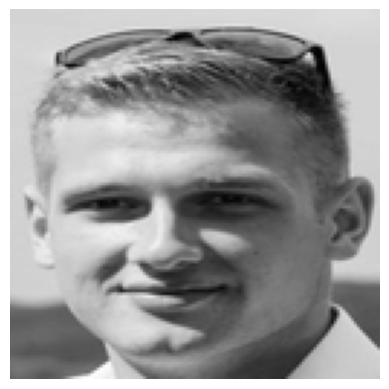

In [5]:
image_path = output_file_2
img = preprocess_image(image_path)

pred = loaded_model.predict(img.reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(img.reshape(128, 128), cmap='gray');

1/1 [==============================] - 0s 54ms/step
Predicted Gender: Male Predicted Age: 25


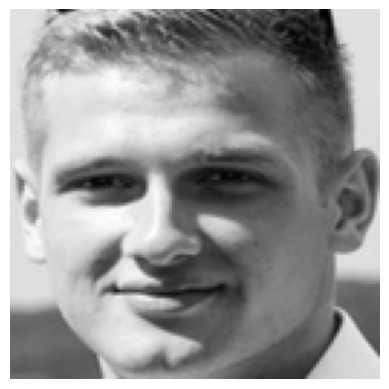

In [6]:
image_path = output_file_3
img = preprocess_image(image_path)

pred = loaded_model.predict(img.reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(img.reshape(128, 128), cmap='gray');